In [7]:
from PIL import Image
import numpy as np
import os
from soview import *
import shutil
import os
import gc
def read_tiff(path):
    """
    path - Path to the multipage-tiff file
    """
    img = Image.open(path)
    images = []
    for i in range(img.n_frames):
        img.seek(i)
        images.append(np.array(img))
    return np.array(images)







scanpy==1.8.2 anndata==0.8.0 umap==0.5.2 numpy==1.20.3 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.1 python-igraph==0.9.8 pynndescent==0.5.5
squidpy==1.1.2


In [2]:
tiff_path = '/aaa/jianhuayao/project2/zhiyuanyuan/PUBDT/st/mibi/risom2022transition/d87vg86zd8-3/tiff/raw_tifs_masks'
sample = 'Point2203_pt1072_31606'

In [57]:
data_path = f'{tiff_path}/{sample}/TIFs'
h5ad_path = '/aaa/jianhuayao/project2/zhiyuanyuan/PUBDT/st/mibi/risom2022transition/d87vg86zd8-3/h5ad'

In [52]:
tiff_list = []
protein_list = []
for protein_file in os.listdir(data_path):
    if 'tif' not in protein_file:
        continue
    protein = protein_file.split('.')[0]
    cur_tiff = read_tiff(f'{data_path}/{protein_file}')
    cur_tiff = cur_tiff.reshape(cur_tiff.shape[1],cur_tiff.shape[1],1)
    tiff_list.append(cur_tiff)
    protein_list.append(protein)
tiff_mat = np.concatenate(tiff_list,axis=2)

    

In [56]:
sz = tiff_mat.shape[0]
spatialmat_list = []
for i in range(sz):
    for j in range(sz):
        spatialmat_list.append([i,j])
spatial_mat = np.array(spatialmat_list)


In [59]:
adata = ad.AnnData(X=tiff_mat.reshape(-1,tiff_mat.shape[2]))
adata.var_names = protein_list
adata.obsm['spatial'] = spatial_mat
adata.write_h5ad(f'{h5ad_path}/{sample}.h5ad')

/tmp/ipykernel_1270/1534423754.py:1: FutureWarning: X.dtype being converted to np.float32 from uint8. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X=tiff_mat.reshape(-1,tiff_mat.shape[2]))


In [66]:
for sample in os.listdir(tiff_path):
    if 'Point' not in sample:
        continue
    data_path = f'{tiff_path}/{sample}/TIFs'
    tiff_list = []
    protein_list = []
    for protein_file in os.listdir(data_path):
        if 'tif' not in protein_file:
            continue
        protein = protein_file.split('.')[0]
        cur_tiff = read_tiff(f'{data_path}/{protein_file}')
        cur_tiff = cur_tiff.reshape(cur_tiff.shape[1],cur_tiff.shape[1],1)
        tiff_list.append(cur_tiff)
        protein_list.append(protein)
    tiff_mat = np.concatenate(tiff_list,axis=2)

    sz = tiff_mat.shape[0]
    spatialmat_list = []
    for i in range(sz):
        for j in range(sz):
            spatialmat_list.append([i,j])
    spatial_mat = np.array(spatialmat_list)

    adata = ad.AnnData(X=tiff_mat.reshape(-1,tiff_mat.shape[2]))
    adata.var_names = protein_list
    adata.obsm['spatial'] = spatial_mat
    adata.write_h5ad(f'{h5ad_path}/{sample}.h5ad')
    print(sample)


/tmp/ipykernel_1270/1473809109.py:24: FutureWarning: X.dtype being converted to np.float32 from uint8. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X=tiff_mat.reshape(-1,tiff_mat.shape[2]))


Point4103_pt1173_30993
Point2314_pt2002_20703_Normal
Point4114_pt2006_31801_Normal
Point3121_pt1211_31686
Point6202_pt1027_20594
Point2328_pt1099_20734
Point3107_pt1188_31663
Point2305_pt2000_20689_Normal
Point2321_pt1043_20717
Point4142_pt2008_Normal
Point3128_pt1085_31690
Point2313_pt1094_20702
Point3119_pt1166_31684
Point4116_pt1065_31821
Point2318_pt1054_20706
Point2311_pt1053_20698
Point4117_pt1143_31822
Point4133_pt1027_31855
Point3109_pt2004_31653_Normal
Point3105_pt1173_31661
Point2302_pt1046_20671
Point2309_pt1039_20694
Point5309_pt1134_31636
Point3120_pt1177_31685
Point6103_pt1008_20624
Point2304_pt1089_20677
Point4118_pt2007_31824_Normal
Point2310_pt1052_20696
Point4128_pt1064_31843
Point5308_pt1074_31629
Point4136_pt1058_31850
Point2312_pt1064_20700
Point4115_pt1107_31817
Point4106_pt1162_30997
Point3125_pt1167_31695
Point3117_pt1082_31677
Point4102_pt2005_30990_Normal
Point4410_pt1181_31721
Point5302_pt1070_31594
Point2324_pt2003_20721_Normal
Point2322_pt1057_20718
Point31

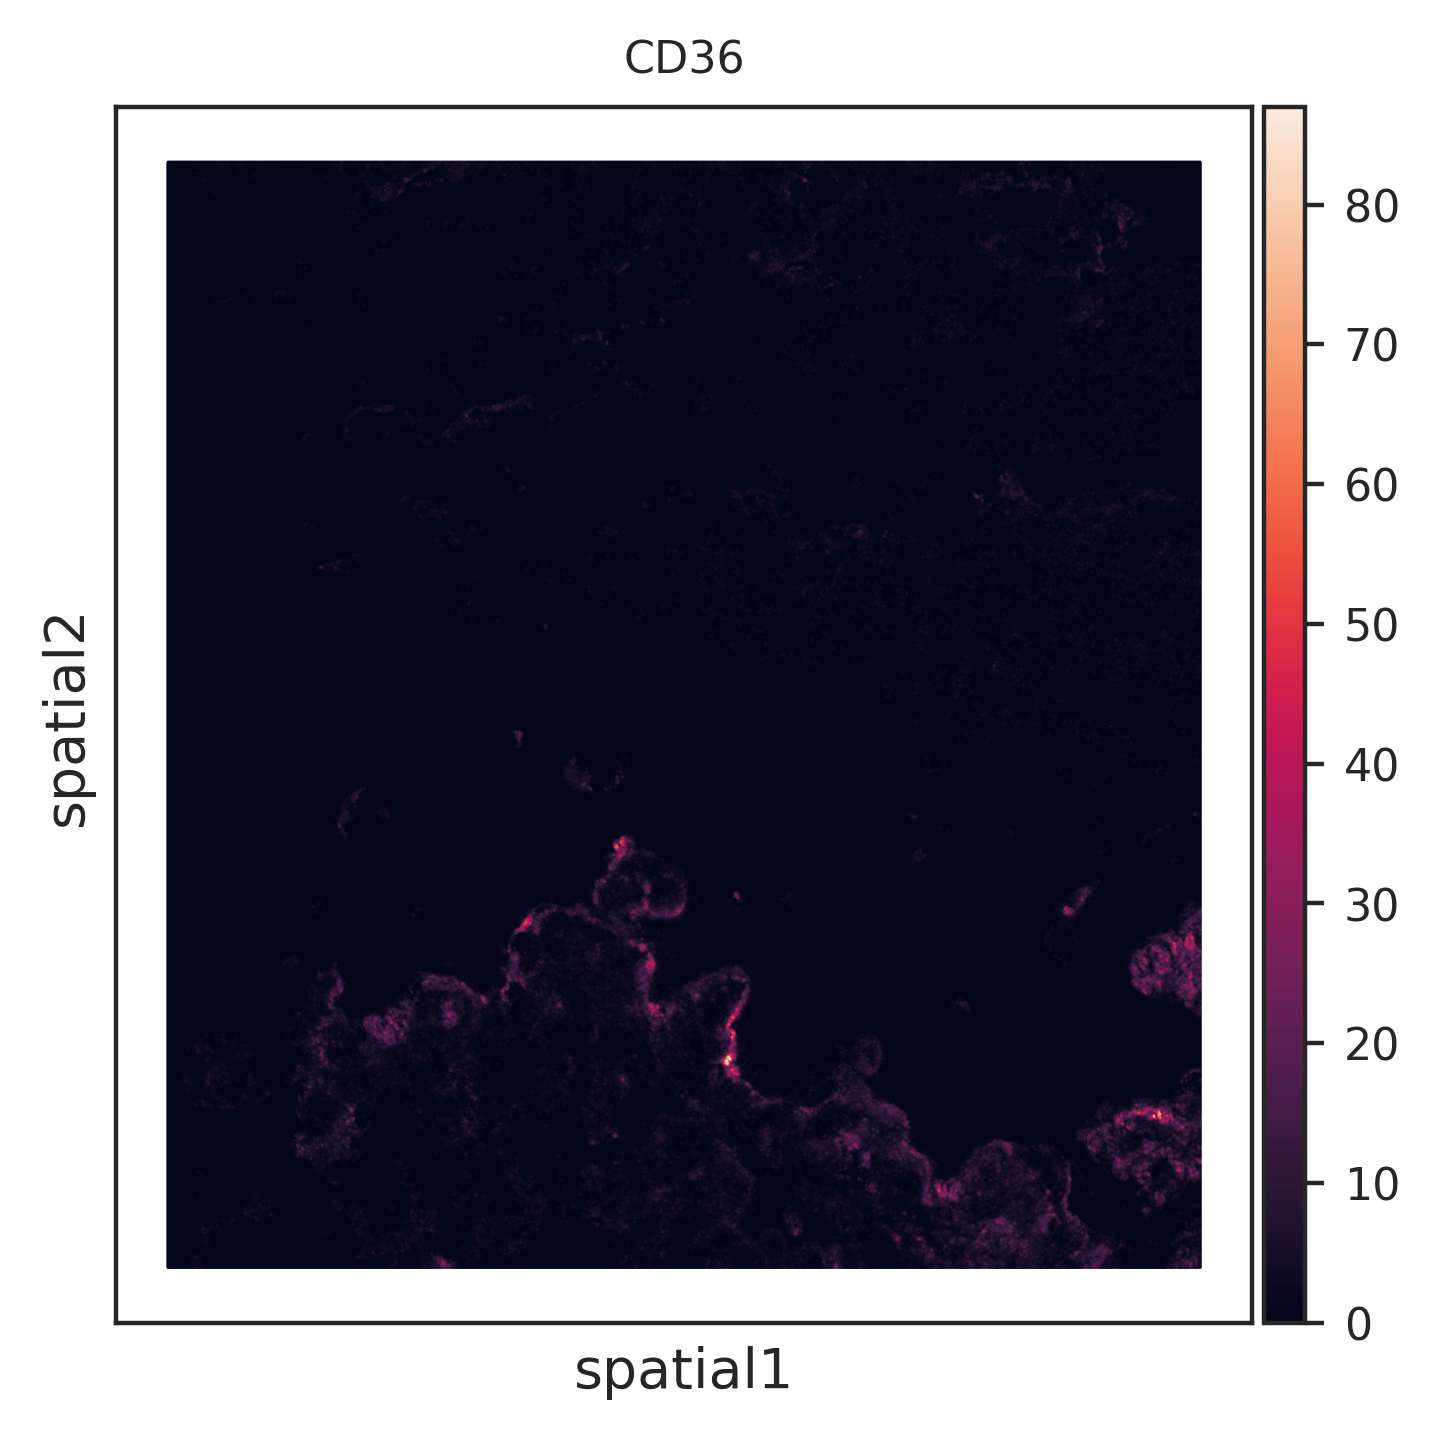

In [64]:
sc.pl.embedding(adata,basis='spatial',color='CD36',size=1)